![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for Wflow model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#wflow). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for Wflow is created using the ESMValTool recipe. It produces one file that contains three variables: temperature, precipitation, and potential evapotranspiration. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

To download `wflow_dem.map`, see the [instructions](https://ewatercycle.readthedocs.io/en/latest/system_setup.html#download-example-parameter-sets).

In [3]:
wflow_forcing = ewatercycle.forcing.sources["WflowForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1990-12-31T00:00:00Z",
    shape="./data/Rhine/Rhine.shp",
    dem_file="./wflow_rhine_sbm_nc/staticmaps/wflow_dem.map",
)

{'auxiliary_data_dir': PosixPath('/home/sarah/GitHub/ewatercycle/docs/examples'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210713_095838/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210713_095838/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210713_095838/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210713_095838/work'),
 'write_netcdf': True,
 'write_plots': True}


In [7]:
print(wflow_forcing)

Forcing data for Wflow
----------------------
Directory: /home/sarah/temp/output/recipe_wflow_20210713_095838/work/wflow_daily/script
Start time: 1990-01-01T00:00:00Z
End time: 1990-12-31T00:00:00Z
Shapefile: None
Additional information for model config:
  - netcdfinput: wflow_ERA5_Rhine_1990_1990.nc
  - Precipitation: /pr
  - Temperature: /tas
  - EvapoTranspiration: /pet
  - Inflow: None


### Plot forcing

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 169, lon: 187, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01T12:00:00 ... 1990-12-31T12:00:00
  * lat        (lat) float64 52.05 52.02 51.98 51.94 ... 46.0 45.97 45.93 45.89
  * lon        (lon) float64 5.227 5.264 5.3 5.337 ... 11.94 11.97 12.01 12.05
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 0.2794 0.2794 0.2794 ... nan nan nan
    time_bnds  (time, bnds) datetime64[ns] 1990-01-01 1990-01-02 ... 1991-01-01
    lat_bnds   (lat, bnds) float64 52.07 52.04 52.04 52.0 ... 45.91 45.91 45.88
    lon_bnds   (lon, bnds) float64 5.209 5.245 5.245 5.282 ... 12.03 12.03 12.07
    tas        (time, lat, lon) float32 0.09246 0.07101 0.03317 ... nan nan nan
    pet        (time, lat, lon) float32 0.5102 0.5103 0.5106 ... nan nan nan
Attributes:
    Conventions:  CF-1.7
    provenance:   <?xml version='1.0' encoding='ASCII'?>\n<prov:document xmln...
 

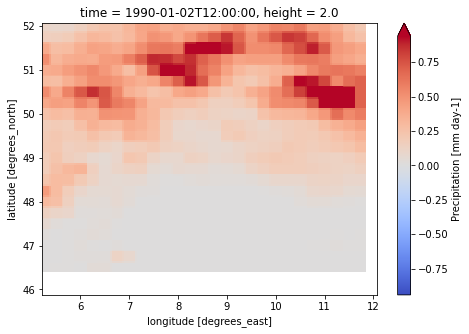

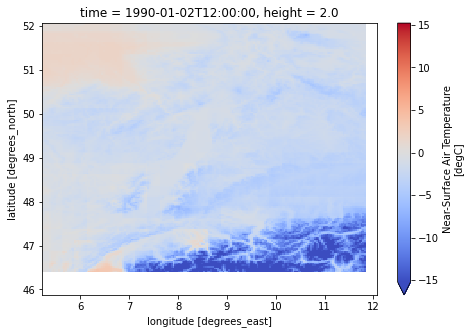

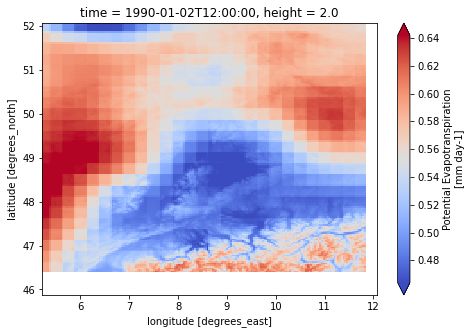

In [8]:
dataset = xr.load_dataset(f"{wflow_forcing.directory}/{wflow_forcing.netcdfinput}")
print(dataset)
for var in ["pr", "tas", "pet"]:
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)